In [2]:
import binance_api as binance
from stats_lib import my_pca
import tech_lib as tech
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
dataset = binance.historical_data(
    'lmxX1ymc6vGTQYkgUR194NeUxrhZQXM2xnf0rvjtQV4XxgP9xS9rawF6CvQRO2pw',
    'rNFCb6OYjktZ1O6yfpNy1EItYJGwOMe8rtW8salpdXDHaNQGdxJDwpqgXrysxjN7',
    'BTCUSDT',
    '1m',
    (2024, 1, 1, 0, 0, 0),
    (2025, 1, 1, 0, 0, 0)
)

In [8]:
#dataset = pd.read_csv(os.getcwd()+'\\dataset.csv', index_col='Open Time')

dataset = dataset.drop('Close Time', axis=1)
dataset['Close_h1'] = dataset.Close - dataset.Close.diff(-1)

dataset['Returns'] = np.log(dataset['Close'] / dataset['Close'].shift(1))
dataset['Returns_h1'] = dataset.Returns - dataset.Returns.diff(-1)
dataset['obv'] = tech.obv(dataset.Close, dataset.Volume)

# Définir les périodes spécifiques pour chaque indicateur
#window_cmf = range(12,25, 12)
window_cmf = range(12,25, 12)
window_rsi = range(12,25, 12)
window_ma  = range(12,25, 12)
window_ema = range(12,25, 12)

# Boucle pour calculer les indicateurs avec différentes fenêtres
for w_cmf, w_rsi, w_ma, w_ema in zip(window_cmf, window_rsi, window_ma, window_ema):
    dataset[f'cmf_{w_cmf}'] = tech.cmf(dataset.High, dataset.Low, dataset.Close, dataset.Volume, window=w_cmf)
    dataset[f'rsi_{w_rsi}'] = tech.rsi(dataset.Close, window=w_rsi)
    dataset[f'ma_{w_ma}'] = tech.ma(dataset.Close, window=w_ma)
    dataset[f'ema_{w_ema}'] = tech.ema(dataset.Close, window=w_ema)

dataset['diff_rsi_12'] = dataset['rsi_12'].diff(1)
dataset['diff_obv'] = dataset['obv'].diff(1)
dataset['diff_ema_12'] = dataset['ema_12'].diff(1)
dataset['diff_ma_12'] = dataset['ma_12'].diff(1)
dataset['diff_cmf_12'] = dataset['cmf_12'].diff(1)

dataset = dataset.dropna()

In [9]:
dataset.tail()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore,...,ema_12,cmf_24,rsi_24,ma_24,ema_24,diff_rsi_12,diff_obv,diff_ema_12,diff_ma_12,diff_cmf_12
Open Time,,,,,,,,,,,,,,,,,,,,,
2024-12-31 23:55:00,93646.97,93667.52,93646.96,93667.52,4.31339,403978.444964,452.0,3.97547,372332.403686,0,...,93604.186407,-0.077013,53.131907,93540.448750,93582.707249,4.480535,4.31339,11.515199,16.892500,0.229755
2024-12-31 23:56:00,93667.51,93676.98,93636.37,93636.37,2.87066,268877.529840,1155.0,1.15857,108515.116328,0,...,93609.137729,-0.064078,52.321535,93541.710833,93587.000269,-9.358445,-2.87066,4.951322,12.125000,-0.095845
2024-12-31 23:57:00,93636.38,93643.24,93616.04,93616.04,2.19230,205276.780936,698.0,0.88765,83119.011307,0,...,93610.199617,0.023175,56.991869,93545.200417,93589.323447,-5.556744,-2.19230,1.061888,9.337500,-0.068579
2024-12-31 23:58:00,93616.05,93616.05,93600.00,93600.00,2.17256,203385.127592,441.0,1.09126,102159.181091,0,...,93608.630445,-0.043563,54.488448,93547.449167,93590.177572,-3.336454,-2.17256,-1.569172,7.815000,-0.085846
2024-12-31 23:59:00,93600.01,93616.05,93576.00,93576.00,5.48662,513548.264257,1062.0,3.26948,306031.408285,0,...,93603.610377,-0.085228,54.665754,93549.779167,93589.043366,-1.233351,-5.48662,-5.020069,7.248333,-0.092827


In [10]:
dataset.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Close_h1,...,ema_12,cmf_24,rsi_24,ma_24,ema_24,diff_rsi_12,diff_obv,diff_ema_12,diff_ma_12,diff_cmf_12
count,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,5.270390e+05,527039.00000,527039.000000,5.270390e+05,527039.000000,...,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,527039.000000,5.270390e+05
mean,65896.090459,65920.687332,65871.149800,65896.186777,24.535331,1.612298e+06,1926.15666,12.185505,8.002257e+05,65896.284096,...,65895.651375,0.007598,50.312578,65893.299599,65895.067619,0.000118,-0.028873,0.097346,0.177629,1.838036e-07
std,14679.775019,14686.176955,14673.351078,14679.788768,39.499325,2.635864e+06,2524.40214,21.276436,1.432293e+06,14679.802486,...,14679.465881,0.196560,12.501512,14684.686104,14679.140005,8.064869,46.479529,14.268809,60.099221,1.159423e-01
min,38558.920000,38578.610000,38555.000000,38558.920000,0.078720,5.071142e+03,58.00000,0.019860,1.194658e+03,38558.920000,...,38629.312409,-1.000000,0.000000,0.000000,38683.560422,-100.000000,-2772.455670,-792.225105,-496.492500,-1.217693e+00
25%,59016.635000,59038.895000,58994.115000,59016.680000,6.649950,4.208702e+05,584.00000,2.608195,1.667774e+05,59016.735000,...,59022.320078,-0.125700,41.556433,59023.246667,59025.547851,-4.668163,-13.487020,-5.526583,-5.745833,-6.815145e-02
50%,64211.000000,64233.340000,64187.410000,64211.060000,13.529440,8.634686e+05,1077.00000,6.242690,3.981898e+05,64211.170000,...,64208.272505,0.006646,50.179804,64209.256667,64210.323075,0.000000,0.000000,0.118198,0.074167,1.359016e-04
75%,69062.860000,69082.055000,69040.040000,69062.925000,27.516675,1.794044e+06,2196.00000,13.735095,8.894112e+05,69062.940000,...,69064.309550,0.138913,58.987520,69062.493958,69060.830184,4.688578,13.472250,5.898836,6.033333,6.799559e-02
max,108258.380000,108353.000000,108168.000000,108258.390000,2772.455670,2.598501e+08,149713.00000,1010.039890,9.010270e+07,108258.390000,...,108065.163289,1.000000,100.000000,107969.486667,107925.372407,100.000000,1451.739370,233.102502,42392.194167,1.310769e+00


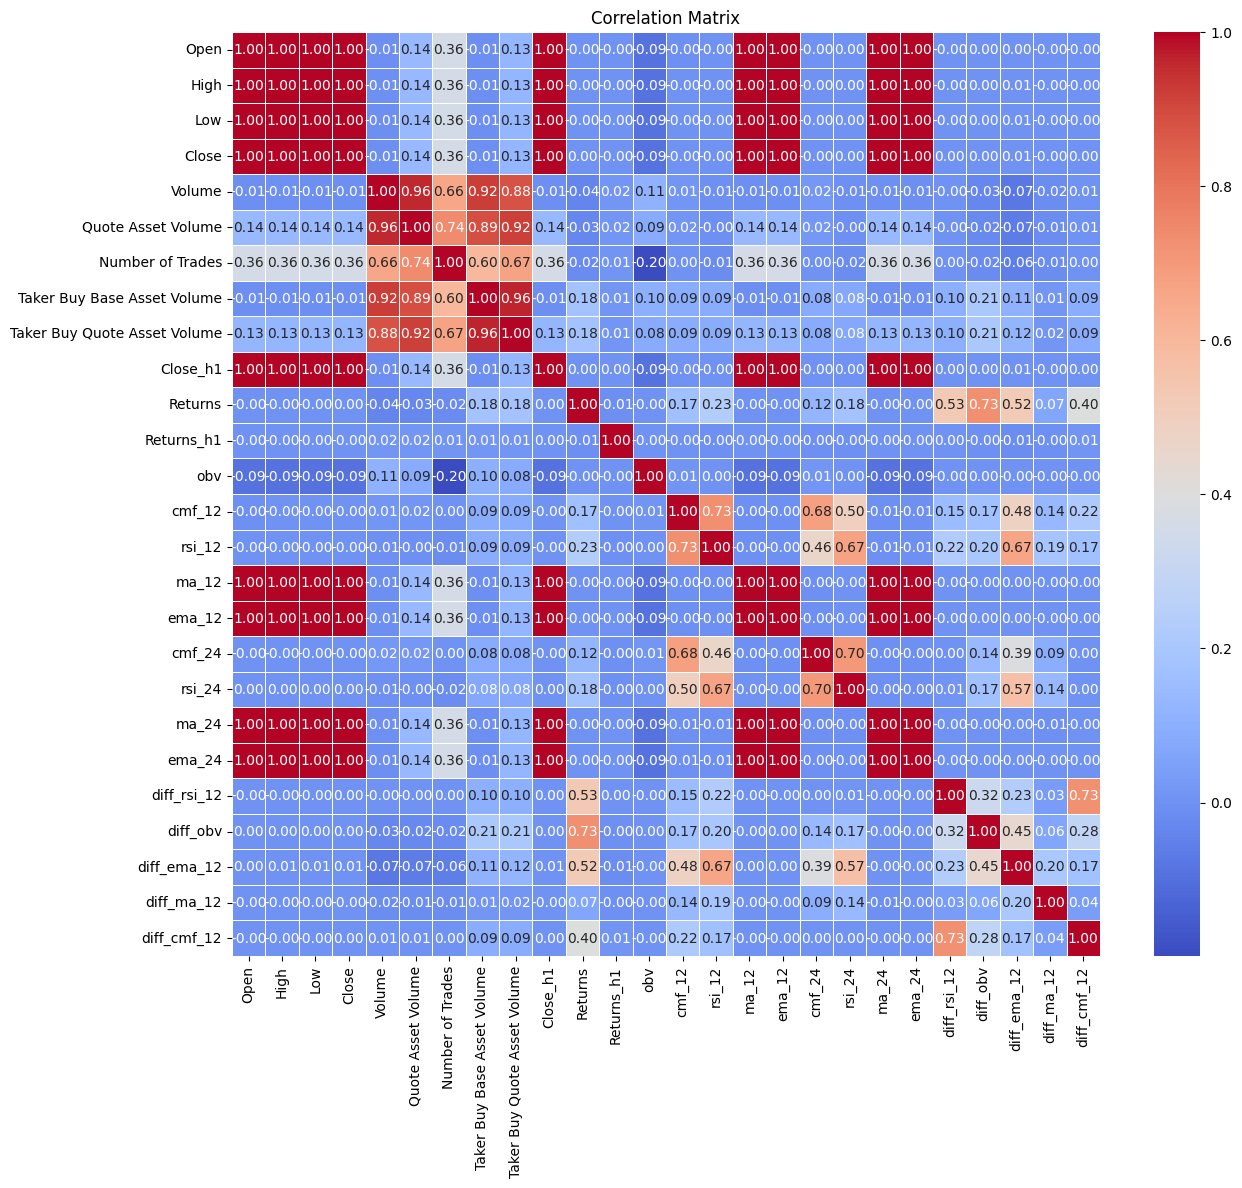

In [11]:
# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
df_numeric = dataset.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
data = dataset[[
    'Returns_h1',
    'diff_obv',
    'diff_ema_12',
    'diff_cmf_12'
]]

data = data.loc['2024-06-01':]

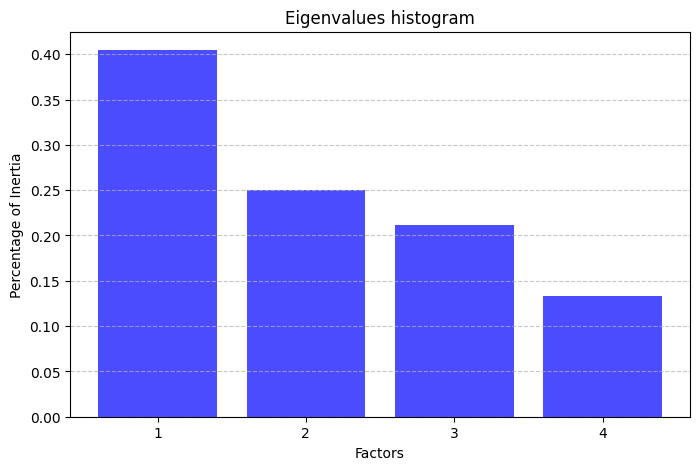

In [17]:
my_pca(data.loc['2024-06-01':]).eigenval_plot()

In [19]:
my_pca(data).var_plot()

Output()